# Part 4: CBC waveforms

This tutorial will show how to generate templates of GW signals from bynary systems during the inspiral, merger and ringdown phases

#### Acknowledgments: 
1) This tutorial was inspired by the Gravitational Wave Open Data Workshop 2018 organized by the LIGO Scientific Collaboration which was held on The California Institute of Technology (Caltech).

2) We will be using the PyCBC library [DOI: 10.5281/zenodo.1472015], which is a open library used to study GW strain data, find astrophysical sources generated by CBC, and study their parameters. Then, we will be using here some of the same tools that were used by the LIGO/Virgo scientific collaboration to find the GW events GW150914, GW151226, GW170104, GW170608, GW170814 and GW170817. 

3) Some reference papers are: *(i)* "The PyCBC search for gravitational waves from compact binary coalescence" arXiv:1508.02357; *(ii)* "PyCBC Inference: A Python-based parameter estimation toolkit for compact binary coalescence signals" arXiv:1807.10312.

4) This research has made use of data, software and/or web tools obtained from the Gravitational Wave Open Science Center (https://www.gw-openscience.org), a service of LIGO Laboratory, the LIGO Scientific Collaboration and the Virgo Collaboration. LIGO is funded by the U.S. National Science Foundation. Virgo is funded by the French Centre National de Recherche Scientifique (CNRS), the Italian Istituto Nazionale della Fisica Nucleare (INFN) and the Dutch Nikhef, with contributions by Polish and Hungarian institutes.

#### Aditional information:
1) For more information, please visit http://www.gravitationalwaves.mx

2) If you are interested in collaborations with us, please contact Dr. Claudia Moreno claudia.moreno@academico.udg.mx

3) We would like to thank the support of the National Council of Science and Technology of Mexico (CONACyT) through "Red Temática de Agujeros Negros y Ondas Gravitatorias" (http://www.redtematicaanyog.mx).

## What waveforms can be generated?

In [2]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print(td_approximants())

# List of fd approximants that are currently available
print(fd_approximants())

# Note that these functions only print what is available for your current
# processing context. If a waveform is implemented in CUDA or OpenCL, it will
# only be listed when running under a CUDA or OpenCL Scheme.

['TaylorF2', 'TaylorEt', 'SEOBNRv3_opt', 'IMRPhenomA', 'IMRPhenomC', 'IMRPhenomB', 'EOBNRv2', 'NRSur7dq2', 'SEOBNRv2_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SpinTaylorF2', 'SpinTaylorF2_SWAPPER', 'SEOBNRv2_ROM_DoubleSpin_HI', 'EOBNRv2_ROM', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv4_opt', 'TaylorF2NL', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'NR_hdf5', 'TEOBResum_ROM', 'SEOBNRv4_ROM', 'SEOBNRv3_pert', 'EOBNRv2HM', 'SpinTaylorT4', 'TaylorT1', 'EOBNRv2HM_ROM', 'TaylorT3', 'TaylorT2', 'HGimri', 'TaylorT4', 'IMRPhenomD', 'IMRPhenomPv2', 'SEOBNRv4T', 'SEOBNRv2T', 'SEOBNRv1', 'SpinDominatedWf', 'SEOBNRv3', 'SEOBNRv2', 'SpinTaylorT1', 'SEOBNRv4', 'SpinTaylorT2', 'EccentricTD', 'SEOBNRv2_opt', 'SEOBNRv3_opt_rk4']
['IMRPhenomD_NRTidal', 'TaylorF2', 'SEOBNRv2_ROM_EffectiveSpin', 'IMRPhenomA', 'IMRPhenomC', 'IMRPhenomB', 'IMRPhenomD', 'SpinTaylorT2Fourier', 'IMRPhenomPv2_INTERP', 'SpinTaylorT4Fourier', 'TaylorF2NLTides', 'IMRPhenomD_INTERP', 'SEOBNRv2_ROM_DoubleSpin'

## 4.1 Generate CBC waveforms

Here we'll generate the gravitational waveforms using one of the available waveform approximants. These can be generated as a time series using [`get_td_waveform`]. 

The key parameters in a CBC GW are the masses of the binary (given in solar masses), the time between samples (in seconds), the starting gravitational-wave frequency (Hz) and the name of the approximant we'd like to generate. A variety of approximants are available that include different physical effects. A full review of the different models is outside of the scope of this tutorial.

In this example, we've chosen to use the 'SEOBNRv4_opt' model. It models the gravitational waveform of inspiralling and merging black holes, and includes the ability for each black hole to spin in the same direction as the orbit (aligned spin).

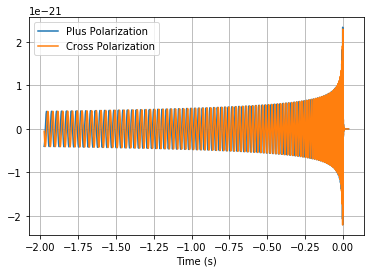

In [2]:
from pycbc.waveform import get_td_waveform
import pylab

# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=100)

pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.grid()
pylab.show()

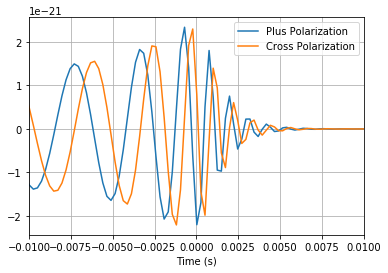

In [2]:
# Zoom in near the merger time#
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

## 4.2 Effect of the mass of the binary on the GW waveform

We will study now how the length of the waveform increases/decreases for lower/higher mass binary mergers.

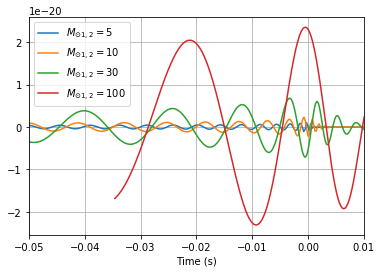

In [3]:
# Component mass of each binary component. We'll simplify here and assume that each 
# component of the binary has the same mass. Again, units are in solar masses.
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=100)
    
    pylab.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
pylab.legend()
pylab.xlim(-.05, .01)
pylab.grid()
pylab.xlabel('Time (s)')
pylab.show()

So, what is the effect of the binary mass in the waveform?

## 4.3 Effect of the distance of the binary on the GW waveform

The distance of the waveform is also selectable when you generate a waveform. The units used are Megaparsecs. Keep in mind that no redshift effects are taken into account here, so there is a simple linear relationship between distance and amplitude

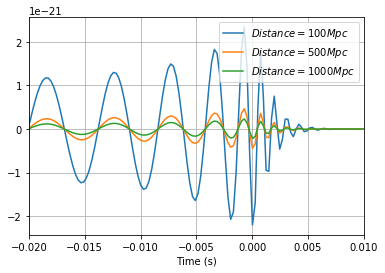

In [4]:
for d in [100, 500, 1000]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30,
                         distance=d)
    
    pylab.plot(hp.sample_times, hp, label='$Distance=%sMpc$' % d)
pylab.xlim(-.02, .01)
pylab.legend()
pylab.grid()
pylab.xlabel('Time (s)')
pylab.show()

So, what is the effect of the binary distance in the waveform?

## 4.4 Activity: Effect of the spin of the binary on the GW waveform

By default, the spin of the GW waveform generated with [get_td_waveform] is 0. We can however change the spin as follows.

The idea is to generate two GW from CBC using the same parameter but different spin

In [5]:
#hp1, hc1 = get_td_waveform(approximant="SEOBNRv4_opt",
#                         mass1=10,
#                         mass2=10,
#                         delta_t=1.0/4096,
#                         f_lower=30,
#                         spin1x=0,
#                         spin1y=0,
#                         spin1z=0,
#                         distance=100)


#hp2, hc2 = get_td_waveform(approximant="SEOBNRv4_opt",
#                         mass1=10,
#                         mass2=10,
#                         delta_t=1.0/4096,
#                         f_lower=30,
#                         spin1x=0.0,
#                         spin1y=0.3,
#                         spin1z=0.0,
#                         distance=100) 


#pylab.plot(hp1.sample_times, hp1, label='h+, spin=')
#pylab.plot(hp2.sample_times, hp2, label='h+, spin=')
#pylab.xlabel('Time (s)')
#pylab.legend()
#pylab.xlim(-.02, .01)
#pylab.grid()
#pylab.show()

So, what is the effect of the spins in the waveform?

## 4.5 Activity: Effect of the approximant on the GW waveform

Generate several GW from CBC using the same parameters but different approximants

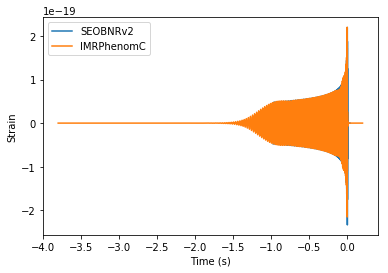

In [4]:
import pylab
from pycbc.waveform import get_td_waveform

for apx in ['SEOBNRv2', 'IMRPhenomC']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)

    pylab.plot(hp.sample_times, hp, label=apx)

pylab.ylabel('Strain')
pylab.xlabel('Time (s)')
pylab.legend()
pylab.show()

So, what is the effect of the approximant in the waveform?